In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import originpro as op
import sys

In [2]:
# Import Peak Area .txt files
path = r"C:\Users\flahertylab\OneDrive - Georgia Institute of Technology\Flaherty Research Group - ESS\01 - Raman Data\ESS-1-146_Transient_Additional_2\Cl Cutoff\Peak Area"
dirlist = os.listdir(path)

for index,file in enumerate(dirlist):
    file_path = path + '\\' + file
    curve_center, extension = os.path.splitext(file)
    curve_center = int(curve_center) # Now can reference header as integer instead of string

    if not index:
        df = pd.read_csv(file_path, sep='\t', names=['Time (s)', curve_center])
        df = df.iloc[1:]
        pass
    else:
        df2 = pd.read_csv(file_path, sep='\t', names=['Time (s)', curve_center])
        df2 = df2.iloc[1:]
        df[curve_center] = df2[curve_center]

df = df.apply(pd.to_numeric, errors='coerce')
df = df.set_index('Time (s)')

df

,1050,1100,1175,1190,120,1320,1450,150,1600,1750,...,625,650,710,770,810,820,860,890,925,990
Time (s),,,,,,,,,,,,,,,,,,,,,
0.000000,5395.143066,62795.964844,21933.439453,611.706482,219244.812500,40115.023438,55276.968750,299442.75000,38259.312500,312295.218750,...,39124.242188,15676.424805,16580.529297,11928.867188,15805.826172,419.449524,16562.410156,38676.687500,161930.640625,18332.722656
37.897292,1166.148193,55997.093750,46248.144531,0.000000,172686.578125,23839.234375,63409.074219,359650.46875,39502.191406,299496.718750,...,31929.785156,18190.267578,13590.562500,17447.912109,13984.257813,7859.275391,7747.787598,38088.937500,149632.078125,27848.093750
75.811969,1177.138306,69709.171875,23713.273438,0.000000,194693.765625,30856.162109,51112.152344,311204.18750,37252.820313,248648.203125,...,42868.281250,21107.347656,12004.324219,3649.369385,21300.941406,329.123322,16241.402344,33127.222656,165031.671875,17987.716797
113.738641,2937.249512,61234.503906,26570.148438,1393.829712,203723.718750,39592.824219,54195.359375,305724.50000,36084.167969,308187.906250,...,36887.621094,18140.466797,13410.796875,11030.190430,18473.677734,500.111084,17684.685547,42554.089844,159284.218750,17113.867188
151.634641,0.000000,79727.898438,14914.494141,429.278015,196827.234375,65782.179688,45897.570313,317014.06250,36824.925781,368358.687500,...,36619.519531,21645.718750,17771.410156,18904.453125,22358.351563,0.000000,18234.837891,41994.628906,148550.156250,26817.871094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501.514508,0.000000,59100.015625,17368.673828,0.000000,200527.796875,28995.117188,46467.683594,306246.50000,39031.929688,246827.984375,...,32882.707031,16648.601563,11061.431641,13378.601563,14371.467773,0.000000,16835.625000,37189.058594,151730.734375,14904.291992
18539.360643,975.658997,50582.000000,21387.583984,1954.798096,198543.046875,36732.781250,54602.992188,317147.87500,29299.742188,296170.375000,...,34122.890625,18843.884766,11100.427734,17922.707031,15709.714844,6472.796875,10038.720703,38676.062500,140956.343750,16241.682617
18577.285972,3843.659912,45502.769531,31772.042969,1555.112793,196034.296875,26914.400391,44631.757813,291402.75000,37811.230469,272500.156250,...,35298.964844,18008.703125,11435.441406,9552.572266,12132.070313,8503.455078,10963.533203,47611.476563,134242.125000,22416.007813


In [3]:
with open('bins.json', 'r') as f:
    column_bins = json.load(f)

binned_dfs = {}
columns = list(df.columns)



for bin_name, (low, high) in column_bins.items():
    selected_cols = [col for col in columns if low <= col <= high]
    if selected_cols:
        #selected_cols.insert(0, 'Time (s)')
        binned_dfs[bin_name] = df[selected_cols]



keys = list(binned_dfs.keys())
index = 3
print(keys[index])
binned_dfs[keys[index]]

Diatomic Oxygen


,1050,1100,810,820,860,890,925,990
Time (s),,,,,,,,
0.000000,5395.143066,62795.964844,15805.826172,419.449524,16562.410156,38676.687500,161930.640625,18332.722656
37.897292,1166.148193,55997.093750,13984.257813,7859.275391,7747.787598,38088.937500,149632.078125,27848.093750
75.811969,1177.138306,69709.171875,21300.941406,329.123322,16241.402344,33127.222656,165031.671875,17987.716797
113.738641,2937.249512,61234.503906,18473.677734,500.111084,17684.685547,42554.089844,159284.218750,17113.867188
151.634641,0.000000,79727.898438,22358.351563,0.000000,18234.837891,41994.628906,148550.156250,26817.871094
...,...,...,...,...,...,...,...,...
18501.514508,0.000000,59100.015625,14371.467773,0.000000,16835.625000,37189.058594,151730.734375,14904.291992
18539.360643,975.658997,50582.000000,15709.714844,6472.796875,10038.720703,38676.062500,140956.343750,16241.682617
18577.285972,3843.659912,45502.769531,12132.070313,8503.455078,10963.533203,47611.476563,134242.125000,22416.007813


In [4]:
# Check that this code grabbed all the columns

original_cols = set(df.columns)
binned_cols = set()
for subdf in binned_dfs.values():
    binned_cols.update(subdf.columns)

if original_cols == binned_cols:
    print("✅ All columns are correctly binned!")
else:
    print("❌ Column mismatch detected.")

    missing = original_cols - binned_cols
    extra = binned_cols - original_cols

    if missing:
        print("Columns missing from bins:", missing)
    if extra:
        print("Columns in bins that are not in original df:", extra)

✅ All columns are correctly binned!


In [5]:
for name, subdf in binned_dfs.items():
    subdf = subdf.copy()
    subdf.loc[:,'Total'] = subdf.sum(axis=1)
    binned_dfs[name] = subdf

keys = list(binned_dfs.keys())
index = 3
print(keys[index])
binned_dfs[keys[index]]

Diatomic Oxygen


,1050,1100,810,820,860,890,925,990,Total
Time (s),,,,,,,,,
0.000000,5395.143066,62795.964844,15805.826172,419.449524,16562.410156,38676.687500,161930.640625,18332.722656,319918.844543
37.897292,1166.148193,55997.093750,13984.257813,7859.275391,7747.787598,38088.937500,149632.078125,27848.093750,302323.672120
75.811969,1177.138306,69709.171875,21300.941406,329.123322,16241.402344,33127.222656,165031.671875,17987.716797,324904.388581
113.738641,2937.249512,61234.503906,18473.677734,500.111084,17684.685547,42554.089844,159284.218750,17113.867188,319782.403565
151.634641,0.000000,79727.898438,22358.351563,0.000000,18234.837891,41994.628906,148550.156250,26817.871094,337683.744142
...,...,...,...,...,...,...,...,...,...
18501.514508,0.000000,59100.015625,14371.467773,0.000000,16835.625000,37189.058594,151730.734375,14904.291992,294131.193359
18539.360643,975.658997,50582.000000,15709.714844,6472.796875,10038.720703,38676.062500,140956.343750,16241.682617,279652.980286
18577.285972,3843.659912,45502.769531,12132.070313,8503.455078,10963.533203,47611.476563,134242.125000,22416.007813,285215.097413


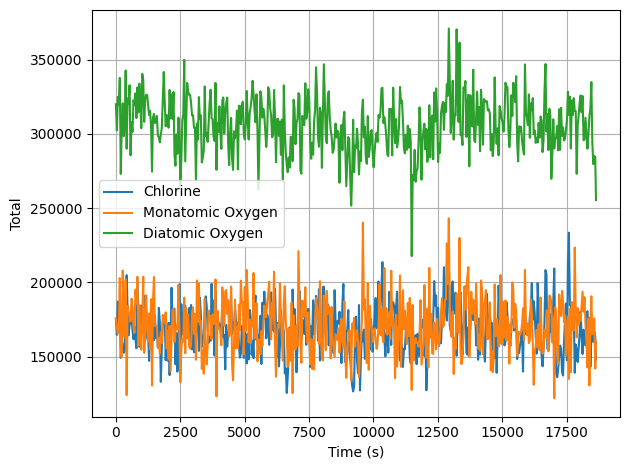

In [6]:
excluded_bins = {'Normalization', 'C2+'}

# Filter binned_dfs
filtered_binned_dfs = {
    name: df for name, df in binned_dfs.items()
    if name not in excluded_bins
}

for name, subdf in filtered_binned_dfs.items():
    
    plt.plot(subdf.index, subdf['Total'], label=name)

plt.xlabel('Time (s)')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
n = 10     # Number of points to average

for name, df in filtered_binned_dfs.items():
    df = df.copy()

    # Create a group ID based on position
    group_ids = [i // n for i in range(len(df))]

    # Convert index to numeric values (in case it's not)
    time_numeric = df.index.to_series().astype(float)

    # Combine data and time index into one DataFrame
    df['_Time'] = time_numeric.values
    grouped = df.groupby(group_ids)

    # Average data + time
    df_avg = grouped.mean()

    # Use averaged time as the new index
    df_avg.index = df_avg['_Time']
    df_avg = df_avg.drop(columns='_Time')

    # Save back
    filtered_binned_dfs[name] = df_avg

filtered_binned_dfs["Chlorine"]

,220,240,280,Total
_Time,,,,
170.599344,59718.814453,13461.384192,93040.239063,166220.437708
549.731404,45655.494891,18938.905249,110512.343750,175106.743890
928.872701,60995.467661,17491.146777,96693.344531,175179.958970
1307.994294,63026.567598,16022.884570,88317.578125,167367.030294
1687.127154,45200.036938,15428.457178,104843.435938,165471.930054
2066.249280,36432.361854,20629.567938,109781.606641,166843.536433
2445.381247,35156.400556,12432.181665,117968.539844,165557.122065
2824.511349,47474.664560,17564.550439,108082.142188,173121.357186
3203.633844,38133.300360,21744.697266,108141.430469,168019.428094


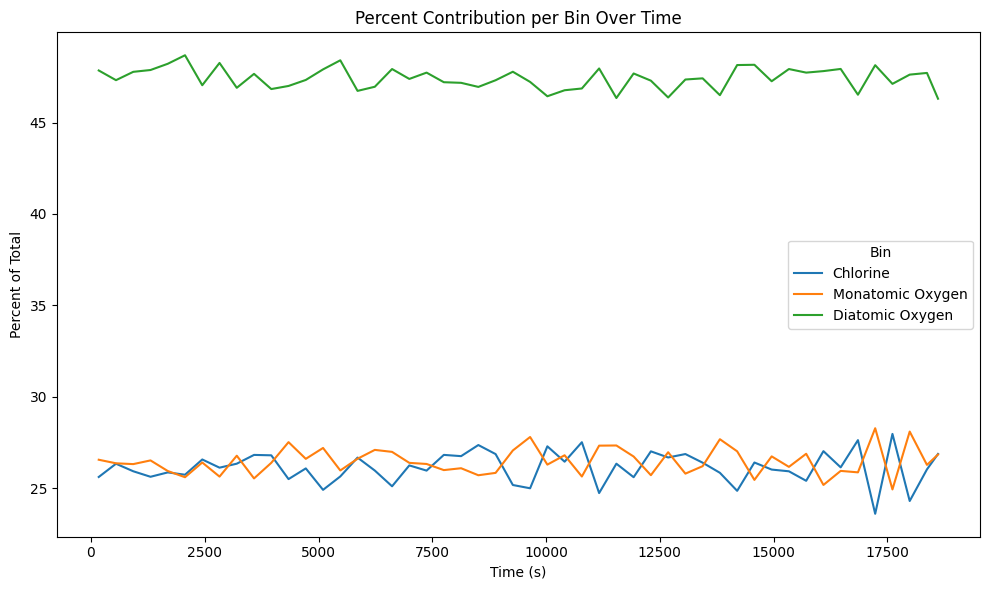

In [8]:
# Step 1: Combine "Total" columns across bins
totals_df = pd.DataFrame({
    name: df['Total']
    for name, df in filtered_binned_dfs.items()
})

# Step 2: Normalize each row to sum to 100%
percent_df = totals_df.div(totals_df.sum(axis=1), axis=0) * 100

percent_df.plot(figsize=(10, 6))
plt.xlabel('Time (s)')
plt.ylabel('Percent of Total')
plt.title('Percent Contribution per Bin Over Time')
plt.legend(title='Bin')
plt.tight_layout()
plt.show()

In [14]:
def origin_shutdown_exception_hook(extype, value, traceback):
    '''Ensures Origin gets shut down if there is an uncaught exception'''
    op.exit()
    sys.__excepthook__(extype, value, traceback)
if op and op.oext:
    sys.excepthook = origin_shutdown_exception_hook

if op.oext:
    op.set_show(True)

# Code here
dest_wks = op.new_sheet('w')

dest_wks.get_book().add_sheet().from_df(percent_df, addindex=True)

gr = op.new_graph(template='scatter')
gl_1 = gr[0]
p1 = gl_1.add_plot('[Book1]Sheet2!(A,B:D)', type='s')
gl_1.group(True, 0, 2)
#p1.color = '#335eff'
gl_1.rescale()

path = r'C:\Users\flahertylab\Desktop\Raman_Analysis_Code'
op.save(path + '\\' + 'test.opju')

op.oext = True
if op.oext:
    op.exit()